# 1. What is an Abalone ?

Abalones are marine snails. Their taxonomy puts them in the family Haliotidae which contains only one genus, Haliotis, which once contained six subgenera. These subgenera have become alternate representations of Haliotis. The number of species recognized worldwide ranges between 30 and 130 with over 230 species-level taxa described. The most comprehensive treatment of the family considers 56 species valid, with 18 additional subspecies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


C:\Users\RAVI KUMAR SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAVI KUMAR SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAVI KUMAR SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

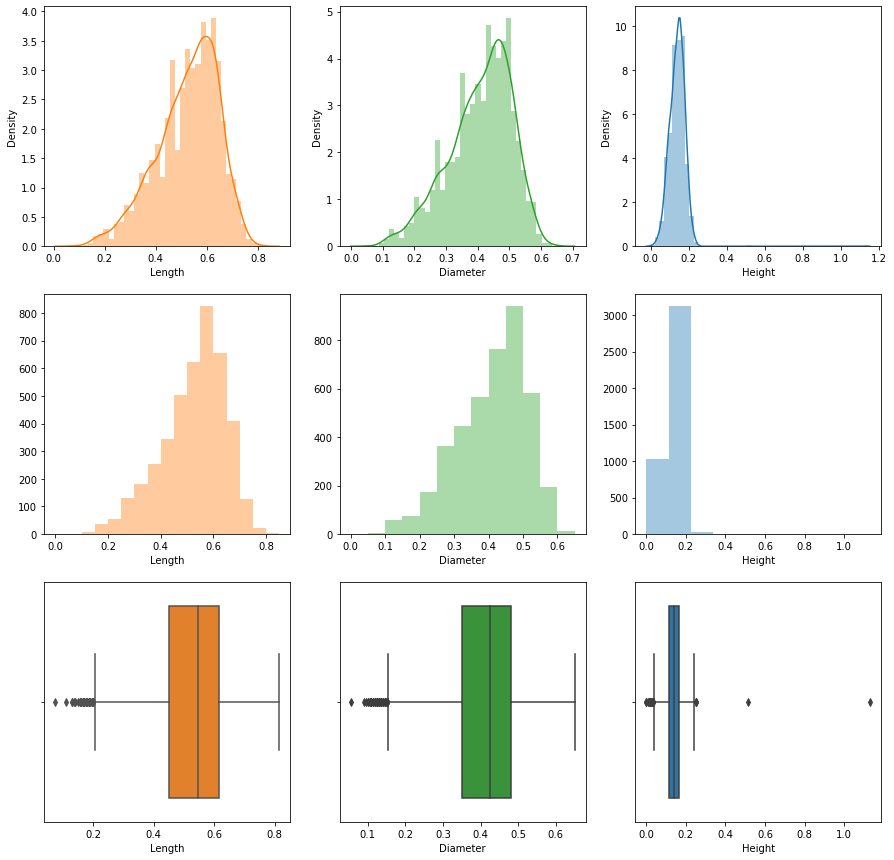

In [4]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], color=colors[i % 3])
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Height'], color=colors[i % 3])

 we analyze the attributes that represents the dimensions of an abalone. These attributes are Lenght, Diameter and Height. For each of these attributes we plotted two histograms and their respective boxplot. The first histogram is a density histogram and a kernel density estimate, and the second is the absolute frquencies of the attribute, with some adjustments to ticks and bins. Once more, we observe an approximate normal distribution.

#### However we notice the high peak formed by the Height histogram. Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution. 

In [5]:
df.shape

(4177, 9)

From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [6]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

As we can see their is no null values.

In [10]:
# Checking for variance in the dataframe.
df.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
age               10.395266
dtype: float64

# Data Visualization

In [11]:
# importing the required libraries.

import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

### Distribution of sex

In [12]:
df_sex = df['Sex'].value_counts()
print(df_sex.head())
trace = go.Bar(x = df_sex.index[: : -1] ,y = df_sex.values[: : -1], marker = dict(color = 'lightseagreen'))
data = [trace]
layout = go.Layout(height = 400, width = 500, title='Sex Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


### Checking for Outliers using Boxplot

<AxesSubplot:ylabel='age'>

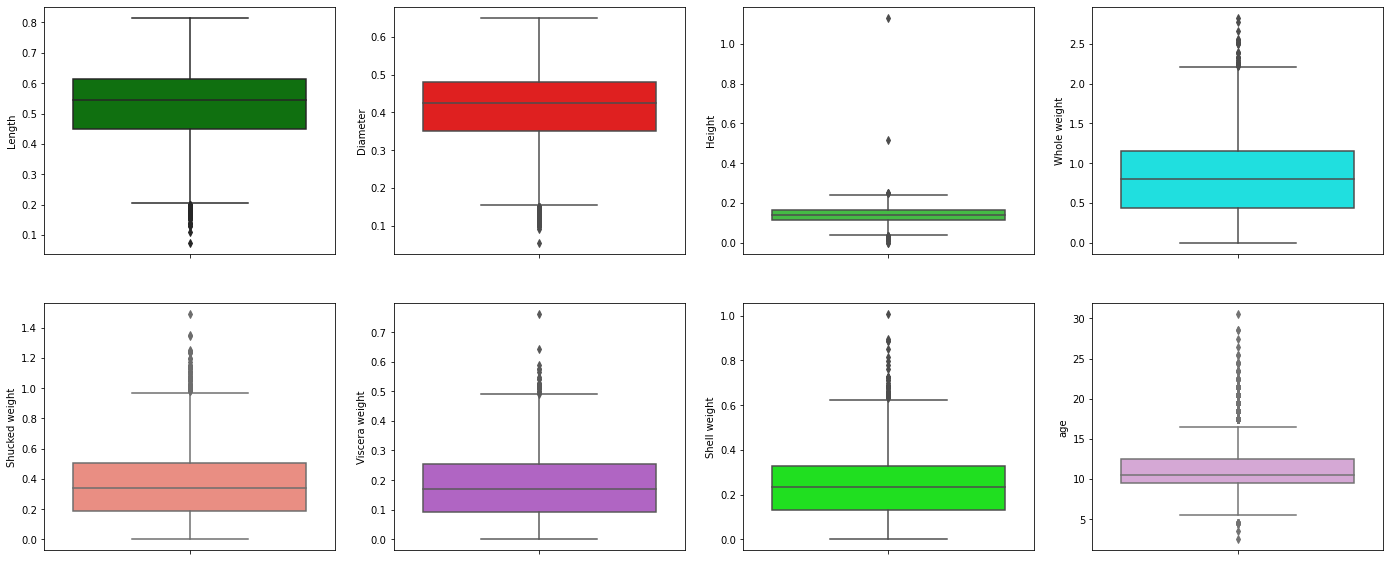

In [13]:
# Using Boxplot for checking Outliers.

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'age', data = df, color = 'plum')

#### As we can see their are outliers present in Length, Diameter, Height,whole weight,Shucked weight, Viscera Weight, age except shell weight

#### Feature Distribution for better Understanding

In [14]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

df_m = df1[df1['Sex'] == 'M']
df_m.drop('Sex', axis = 1, inplace= True)
df_f = df2[df2['Sex'] == 'F']
df_f.drop('Sex', axis = 1, inplace= True)
df_i = df3[df3['Sex'] == 'I']
df_i.drop('Sex', axis = 1, inplace= True)
df_m.drop(['age'], axis=1, inplace = True)
df_f.drop(['age'], axis=1, inplace = True)
df_i.drop(['age'], axis=1, inplace = True)

df_m = df_m.mean()
df_f = df_f.mean()
df_i = df_i.mean()
trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'M', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'F', marker = dict(color = 'violet'))
trace3 = go.Bar(x = df_i.index[::-1], y = df_i.values[::-1], name = 'I', marker = dict(color = 'lightsteelblue'))
data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Feature Distribution', width = 800)
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

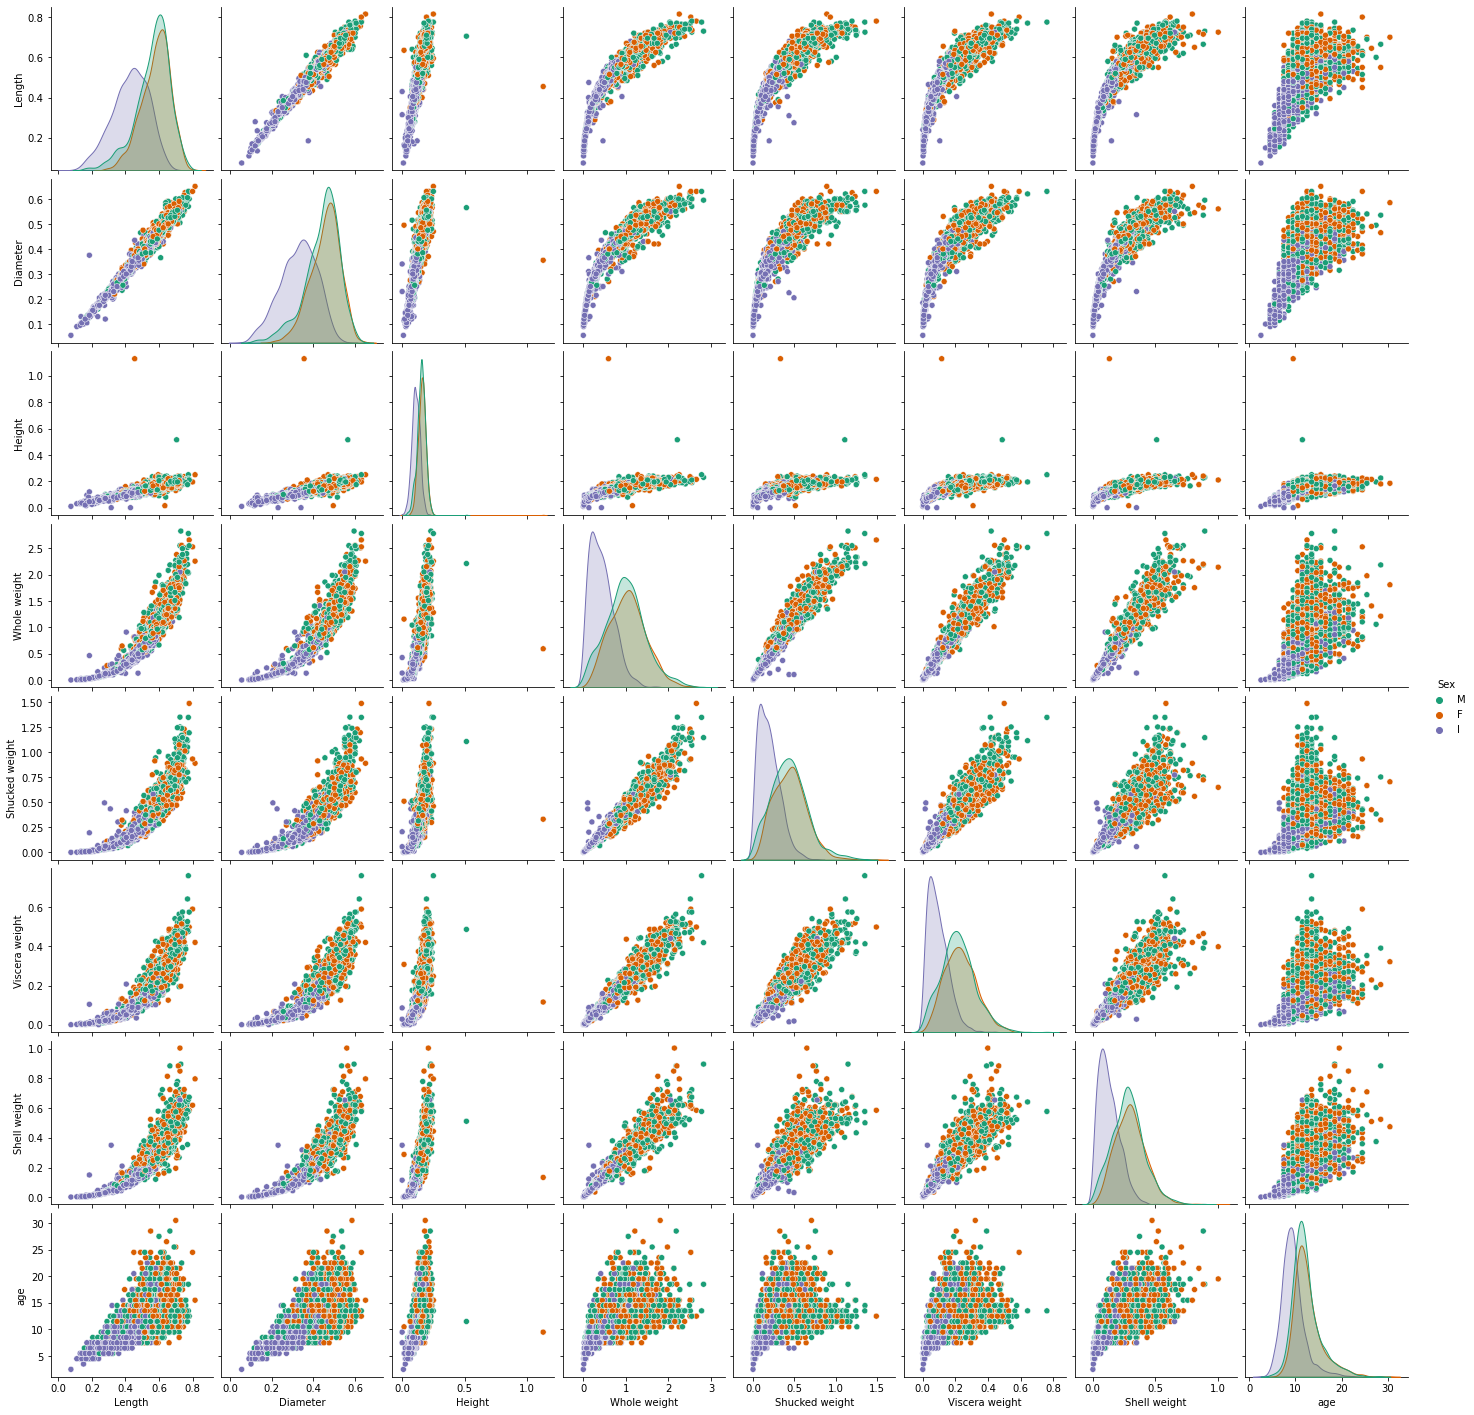

In [15]:
sns.pairplot(data = df, hue = 'Sex', palette = 'Dark2')

####  Now we will use seaborn lmplot to look for outliers and removing them

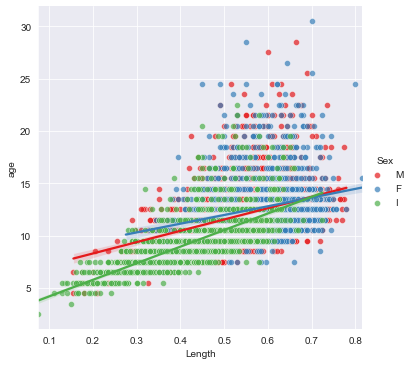

In [16]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'age', data = df, hue = 'Sex', palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [17]:
df.drop(df[(df['Length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['age']< 25)].index, inplace=True)

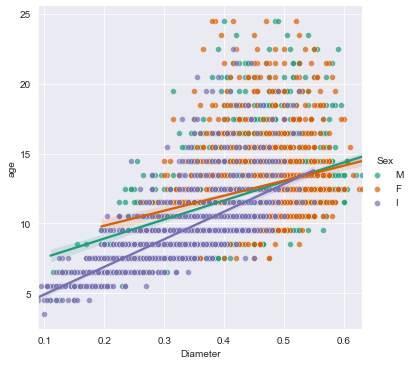

In [18]:
sns.lmplot(x = 'Diameter', y = 'age', data = df, hue = 'Sex', palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [19]:
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

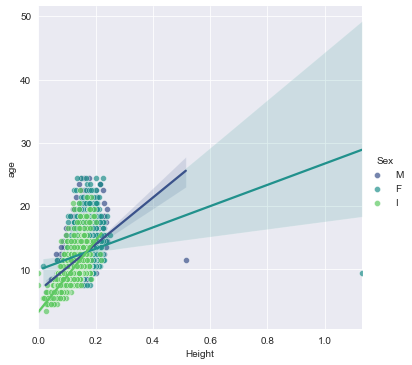

In [20]:
sns.lmplot(x = 'Height', y = 'age', data = df, hue = 'Sex', palette = 'viridis', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [21]:
df.drop(df[(df['Height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['age'] > 25)].index, inplace=True)

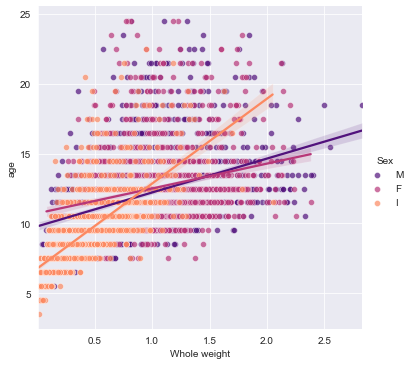

In [22]:
sns.lmplot(x = 'Whole weight', y = 'age', data = df, hue = 'Sex', palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [23]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['age'] > 25)].index, inplace=True)

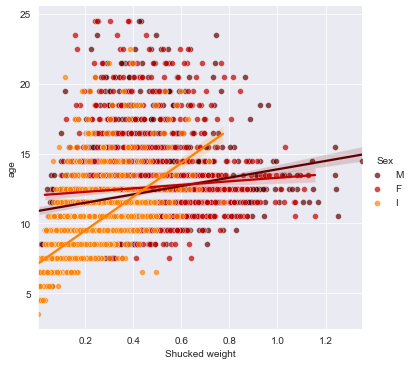

In [24]:
sns.lmplot(x = 'Shucked weight', y = 'age', data = df, hue = 'Sex', palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [25]:
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

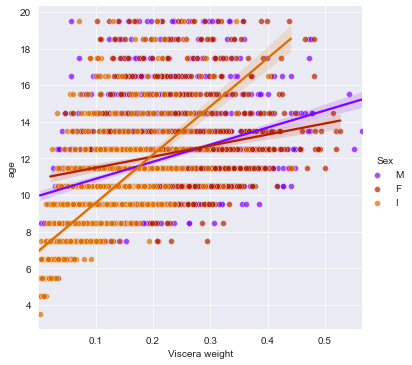

In [26]:
sns.lmplot(x = 'Viscera weight', y = 'age', data = df, hue = 'Sex', palette = 'gnuplot', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [27]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

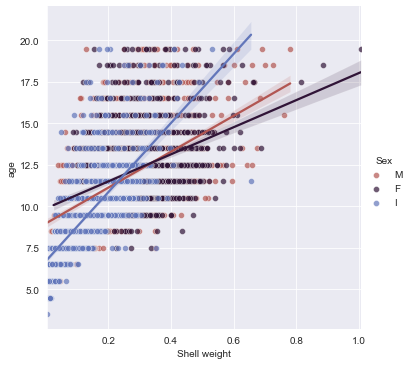

In [28]:
sns.lmplot(x = 'Shell weight', y = 'age', data = df, hue = 'Sex', palette = 'twilight_r', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [29]:
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

# Now looking for correlation in data using seaborn heatmap.

<AxesSubplot:>

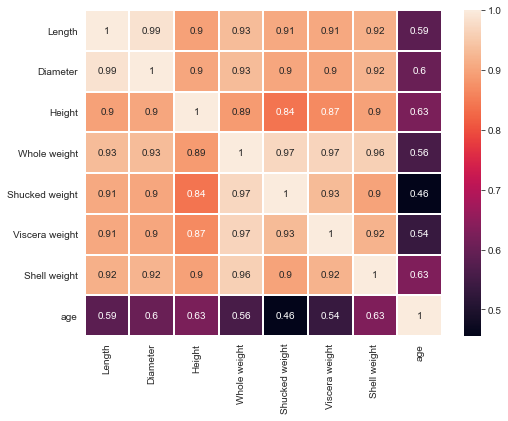

In [32]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True,linewidth=1)

In [33]:
# We will drop Categorical column ('Sex')

df.drop('Sex', axis = 1, inplace = True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [34]:
df['age'].value_counts()

10.5    686
11.5    622
9.5     567
12.5    469
8.5     391
7.5     259
13.5    247
14.5    197
15.5    118
6.5     115
16.5    102
17.5     61
5.5      57
18.5     51
19.5     38
4.5      14
3.5       1
Name: age, dtype: int64

In [35]:
df['age'].mean()

11.127284105131414

In [36]:
df_1 = df.copy()
Age = []
for i in df_1['age']:
    if i > 11.12:
        Age.append('1')
    else:
        Age.append('0')
df_1['Age'] = Age
df_1.drop('age', axis = 1, inplace = True)
df_1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [38]:
df_1['Age'].value_counts()

0    2090
1    1905
Name: Age, dtype: int64

In [39]:
X = df_1.drop('Age', axis = 1).values
y = df_1['Age'].values

### Train test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now will we start training our model.

### 1. Using Logistic Regression.

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       611
           1       0.78      0.72      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[494 117]
 [167 421]]
Training Score:  0.7832618025751072
Testing Score:  0.7631359466221852


### 2. Support Vector Classifier

In [43]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       611
           1       0.77      0.78      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[477 134]
 [130 458]]
Training Score:  0.8029327610872675
Testing Score:  0.7798165137614679


### 3. K Nearest Neighbors Classifier

In this we need to choose number of neighbours:

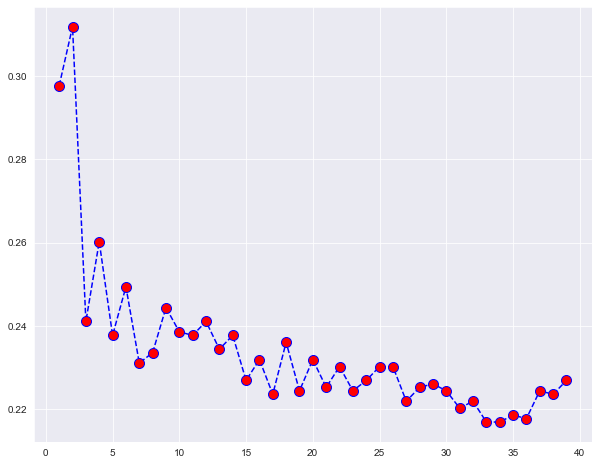

In [44]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [45]:
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       611
           1       0.78      0.77      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[480 131]
 [133 455]]
Training Score:  0.7896995708154506
Testing Score:  0.7798165137614679


### 4. Decision Tree Classifier

In [46]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       611
           1       0.75      0.78      0.77       588

    accuracy                           0.76      1199
   macro avg       0.77      0.77      0.76      1199
weighted avg       0.77      0.76      0.76      1199

Confusion Matrix: 
 [[457 154]
 [128 460]]
Training Score:  0.796137339055794
Testing Score:  0.7648040033361134


### 5. Random Forest Classifier 

In [47]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       611
           1       0.76      0.77      0.77       588

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199

Confusion Matrix: 
 [[470 141]
 [133 455]]
Training Score:  0.8050786838340487
Testing Score:  0.7714762301918265


### 6. Ada Boost Classifier

In [48]:
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train) 
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       611
           1       0.75      0.75      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[466 145]
 [148 440]]
Training Score:  0.8004291845493562
Testing Score:  0.755629691409508


### 7. Gradient Boosting Classifier 

In [49]:
gdb = GradientBoostingClassifier(n_estimators= 200, max_depth = 2, min_samples_leaf= 2)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       611
           1       0.79      0.77      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[490 121]
 [138 450]]
Training Score:  0.8193848354792561
Testing Score:  0.7839866555462885


### 8. XG Boost Classifier  

In [50]:
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 100, max_depth = 3, subsample = 0.8, colsample_bytree = 0.6, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
xgb_train_acc = xgb.score(X_train, y_train) 
print('Training Score: ', xgb_train_acc)
xgb_test_acc = xgb.score(X_test, y_test)
print('Testing Score: ', xgb_test_acc)

[20:35:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       611
           1       0.78      0.78      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[482 129]
 [132 456]]
Training Score:  0.8140200286123033
Testing Score:  0.7823185988323603


C:\Users\RAVI KUMAR SHARMA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



### Plotting Accuracy Graph using plotly 

In [51]:
x = ['Logistic Regression','SVC', 'KNN', 'Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost']
y1 = [lr_train_acc, svc_train_acc, knn_train_acc, dt_train_acc, rf_train_acc, adb_train_acc, gdb_train_acc, xgb_train_acc]
y2 = [lr_test_acc, svc_test_acc, knn_test_acc, dt_test_acc, rf_test_acc, adb_test_acc, gdb_test_acc, xgb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

As we can see in the above accuracy graph Gradient Boosting is the Best with Accuracy of 0.78.

# Save The Model:

In [52]:
import pickle
filename = "Abalone_case_study.pkl"
pickle.dump(gdb, open(filename,'wb'))

# Conclusion:

In [53]:
import numpy as np
a= np.array(y_test)
predicted = np.array(gdb.predict(X_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
1194,0,0
1195,0,0
1196,1,0
1197,0,1
